In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from graph import draw
import glob
import numpy as np

allfiles=glob.glob("../data/clean/swe_equ/*")

In [2]:
from FBD_classes.Louvain_clustering import *

returns = []
for file in allfiles:
    series = pd.read_csv(file).set_index('Date').Close # Get series with: Date - Close price
    series = np.log(series).diff(1).dropna() # Returns
    series.rename(file[22:-4], inplace=True) # Rename to ticker
    returns.append(series)
equities_returns = pd.concat(returns, axis=1, sort=True)
#clustered = LouvainCorrelationClustering()

C:\Users\agato\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\agato\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\agato\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [5]:
louvain_days2 = LouvainCorrelationClustering(equities_returns.T.iloc[:,500:600])
#louvain_equs = LouvainCorrelationClustering(equities)

In [6]:
window_len = 50
louvains = []
for i in range(window_len, len(equities_returns.index)):
    louvain = LouvainCorrelationClustering(equities_returns.T.iloc[:,i-window_len:i])[0]
    louvain.index = equities_returns.index[i-window_len:i]
    if not len(louvains):
        louvains = louvain
    else:
        louvains = louvains.append(pd.Series(index = [louvain.index[-1]], data = louvain[-1]))
louvains

2010-01-05    0
2010-01-07    1
2010-01-08    0
2010-01-11    0
2010-01-12    0
             ..
2019-12-19    3
2019-12-20    4
2019-12-23    3
2019-12-27    0
2019-12-30    4
Length: 2510, dtype: int64

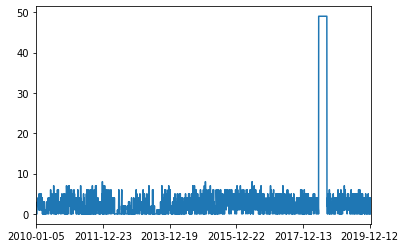

In [51]:
louvains.plot()

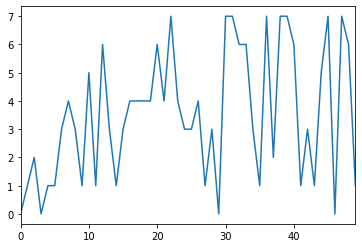

In [33]:
louvain_days2[0][0:50].plot()

In [13]:
np.save('louvain_state_i',np.asarray(louvains.index))

In [23]:
np.load('louvain_state_i.npy', allow_pickle=True).shape

(2510,)